In [134]:

# numpy handles pretty much anything that is a number/vector/matrix/array
import numpy as np
# pandas handles dataframes (exactly the same as tables in Matlab)
import pandas as pd
# matplotlib emulates Matlabs plotting functionality
import matplotlib.pyplot as plt
# stats models is a package that is going to perform the regression analysis
from statsmodels import api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error
# os allows us to manipulate variables on out local machine, such as paths and environment variables
import os
# self explainatory, dates and times
from datetime import datetime, date
# a helper package to help us iterate over objects
import itertools

from sklearn.metrics import plot_confusion_matrix

#import linear regressor model from sk learn 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.utils import shuffle

In [135]:
#extract data from csv 
training_data = pd.read_csv('~/Dropbox/CAB420_Machine_Learning/Assignment_1A/420/420_A1/Assignment 1A/CAB420_Assessment_1A_Data/Data/Q2/training.csv')
testing_data = pd.read_csv('~/Dropbox/CAB420_Machine_Learning/Assignment_1A/420/420_A1/Assignment 1A/CAB420_Assessment_1A_Data/Data/Q2/testing.csv')
print(training_data.head)

#splite data to X and Y
Y_train = training_data.iloc[:, :1]
X_train = training_data.iloc[:, 1:]

Y_test = training_data.iloc[:, :1]
X_test = training_data.iloc[:, 1:]

#convert to numpy array (sklearn wont accept pd dataframe )

X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy().ravel()

X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy().ravel()

#splite data into testing/validation
X_test, X_valid, Y_test, Y_valid = train_test_split(X_test,Y_test, train_size = 0.5, random_state = 0)

#shuffle data
X_train, Y_train = shuffle(X_train, Y_train, random_state=None)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

#print(Y_test)

<bound method NDFrame.head of     class  b1  b2  b3   b4  b5   b6   b7  b8  b9  ...  pred_minus_obs_H_b9  \
0      d   39  36  57   91  59  101   93  27  60  ...                -2.36   
1      h   84  30  57  112  51   98   92  26  62  ...                -2.26   
2      s   53  25  49   99  51   93   84  26  58  ...                -1.46   
3      s   59  26  49  103  47   92   82  25  56  ...                 2.68   
4      d   57  49  66  103  64  106  114  28  59  ...                -2.94   
..    ...  ..  ..  ..  ...  ..  ...  ...  ..  ..  ...                  ...   
193    d   55  61  90   75  55   91   84  24  54  ...                 1.28   
194    d   66  69  93   90  63  100   99  25  57  ...                -1.50   
195    h   79  30  55  115  51   96  109  25  59  ...                -3.66   
196    h   69  27  53  106  47   90   87  24  55  ...                -0.88   
197    h   80  29  55  116  50   95  102  25  59  ...                -4.19   

     pred_minus_obs_S_b1  pred_mi

In [136]:
def eval_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = plot_confusion_matrix(model, X_train, Y_train, normalize=None, xticks_rotation='vertical', ax=ax)
    pred = model.predict(X_train)
    conf.ax_.set_title('Training Set Performance: ' + str(sum(pred == Y_train)/len(Y_train)));
    ax = fig.add_subplot(1, 2, 2)
    conf = plot_confusion_matrix(model, X_test, Y_test, normalize=None, xticks_rotation='vertical', ax=ax)
    pred = model.predict(X_test)
    conf.ax_.set_title('Testing Set Performance: ' + str(sum(pred == Y_test)/len(Y_test)));
    

In [137]:
print("K Neighbour ---------------------------")



print("Grid search")

clf = GridSearchCV(KNeighborsClassifier(),{
        'n_neighbors' : [1,2,3,4,5,7,9,50,70],
        'weights' : ['uniform', 'distance'],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size' : [1,5,10,15,20,25,30,35,40],
        'p' : [1,2],
        #'n_jobs' : [1,-1],

        },cv = 4,return_train_score = False)
clf.fit(X_valid,Y_valid)
#print(clf.cv_results_)
print(clf.best_score_)
print(clf.best_params_)

training_accuracy=[]
test_accuracy=[]
neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    knn=KNeighborsClassifier(n_neighbors)
    knn.fit(X_train,Y_train)
    training_accuracy.append(knn.score(X_train,Y_train))
    test_accuracy.append(knn.score(X_test,Y_test))

print(training_accuracy,test_accuracy)

print("using real data")

#build/train K neighbour clf 
K_neigh = KNeighborsClassifier(algorithm= 'auto', leaf_size= 1, n_neighbors= 3, p= 1, weights= 'uniform')
K_neigh.fit(X_train, Y_train)

y_pred = K_neigh.predict(X_test)


#accuracy
score = accuracy_score(Y_test, y_pred)
print(score)
#visuals   
vis = confusion_matrix(Y_test, y_pred, labels=["s ", "d ", "h ","o "])
print(vis)


K Neighbour ---------------------------
Grid search
0.9191666666666666
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
[1.0, 0.9696969696969697, 0.9797979797979798, 0.9545454545454546, 0.9646464646464646, 0.9444444444444444, 0.9545454545454546, 0.9444444444444444, 0.9545454545454546, 0.9444444444444444] [1.0, 1.0, 1.0, 0.98989898989899, 0.98989898989899, 0.9797979797979798, 0.9797979797979798, 0.9797979797979798, 0.9797979797979798, 0.9797979797979798]
using real data
0.98989898989899
[[29  0  1  0]
 [ 0 28  0  0]
 [ 0  0 25  0]
 [ 0  0  0 16]]


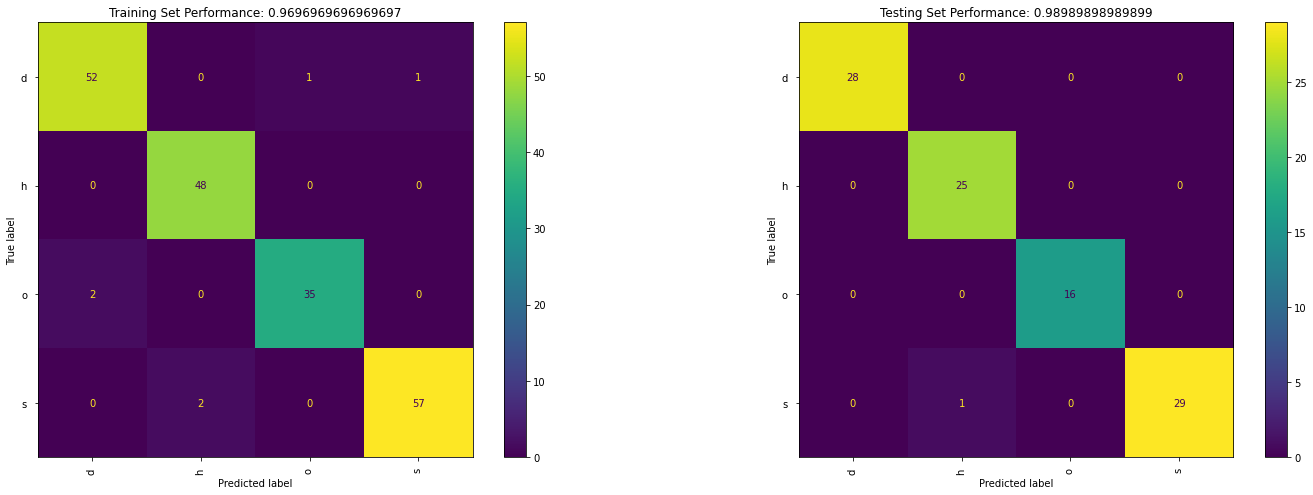

In [138]:
eval_model(K_neigh,X_train,Y_train,X_test,Y_test)


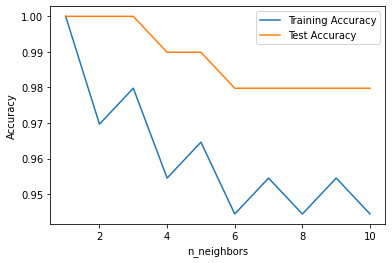

In [139]:
plt.plot(neighbors_settings,training_accuracy,label='Training Accuracy')
plt.plot(neighbors_settings,test_accuracy,label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

In [130]:
print("Ran forest ---------------------------")


print("Grid search")

clf = GridSearchCV(RandomForestClassifier(),{
        'n_estimators' : [25,50,75,100,125],
        'criterion' : ['gini', 'entropy'],
        'max_depth' : [20,30,40,50,None],
        'min_samples_split' : [2,3,4,10],
        'min_samples_leaf' : [1,2,3,4,10],

        },cv = 4,return_train_score = False)
clf.fit(X_valid,Y_valid)
#print(clf.cv_results_)
print(clf.best_score_)
print(clf.best_params_)

print("using real data")

#build/train random forest clf 
forest = RandomForestClassifier(criterion= 'gini', max_depth=40, min_samples_leaf= 2, min_samples_split= 4, n_estimators= 25)
#forest = RandomForestClassifier() 
forest.fit(X_train, Y_train)

y_pred = forest.predict(X_test)


#accuracy
score = accuracy_score(Y_test, y_pred)
print(score)
#visuals   
vis = confusion_matrix(Y_test, y_pred, labels=["s ", "d ", "h ","o "])
print(vis)

Ran forest ---------------------------
Grid search


KeyboardInterrupt: 

In [140]:
print("SVC ---------------------------")


print("Grid search")
clf = GridSearchCV(SVC(),{
        'C' : [1,2,3,4,5],
        'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
        'shrinking' : [True,False],
        'probability' : [True,False],
        'tol' : [1e-1,1e-2,1e-3,5e-3,9e-3,1e-4],

        },cv = 4,return_train_score = False)

#make_pipeline(StandardScaler(), clf).fit(X_valid,Y_valid)
clf.fit(X_valid,Y_valid)

#print(clf.cv_results_)
print(clf.best_score_)
print(clf.best_params_)


print("using real data")

#build/train SVM clf 
SVM = make_pipeline(StandardScaler(), SVC(C= 4, kernel= 'rbf', probability= True, shrinking= True, tol= 0.1))
SVM.fit(X_train, Y_train)

y_pred = SVM.predict(X_test)


#accuracy
score = accuracy_score(Y_test, y_pred)
print(score)
#visuals   
vis = confusion_matrix(Y_test, y_pred, labels=["s ", "d ", "h ","o "])
print(vis)


SVC ---------------------------
Grid search
0.9291666666666666
{'C': 4, 'kernel': 'rbf', 'probability': True, 'shrinking': True, 'tol': 0.1}
using real data
1.0
[[30  0  0  0]
 [ 0 28  0  0]
 [ 0  0 25  0]
 [ 0  0  0 16]]


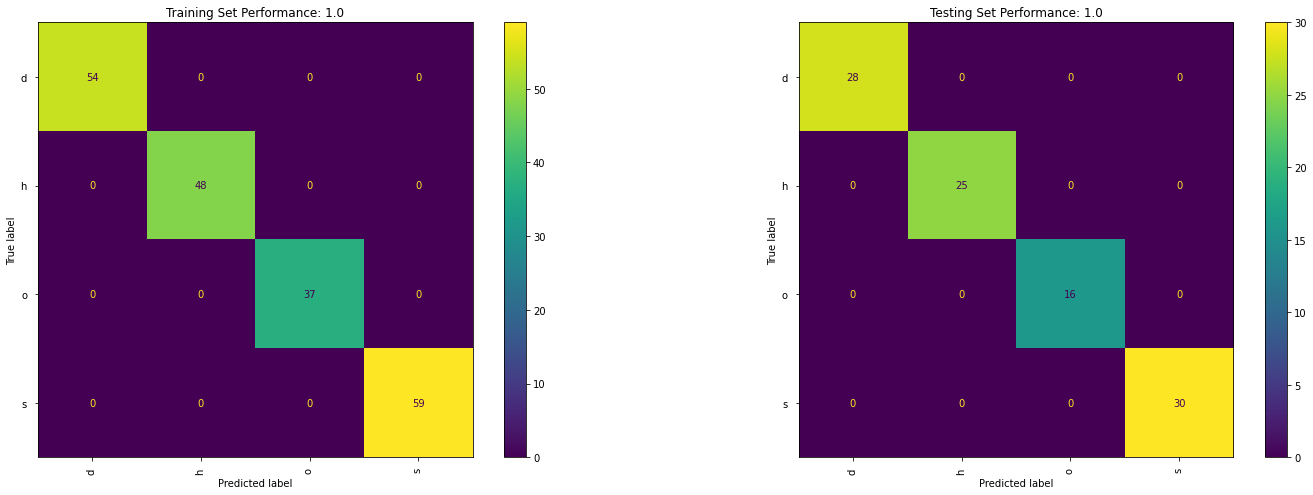

In [141]:
eval_model(SVM,X_train,Y_train,X_test,Y_test)

In [ ]:
pass